<a href="https://colab.research.google.com/github/pernilletemmerud/DCF-PT/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# mounting the file to the notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/DataScienceFundamentals/data_codingtask_1.txt'
df = pd.read_csv(path, delimiter = '\t', header=13)
df.head()

Mounted at /content/drive


,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1.540456e+12,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1.540456e+12,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1.540456e+12,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1.540456e+12,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1.540456e+12,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [4]:
def save_header(p, n):   
  header = ' '     
  with open (path, 'r') as f:  
    lines = f.readlines()  
    for i in range (0,13):
      header += lines[i]  
  f = open(n,'w+')  
  f.write(str(header))
  f.close()

def save_data(p, n):     
  df = pd.read_csv(p, delimiter='\t', header=13)  
  f = open(n, 'w+')     
  f.write(str(df))
  f.close()      
    
save_header(path, 'header.txt')
save_data(path, 'data.csv')

In [5]:
test = open('header.txt', 'r')  
print(test.read())  

 Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node

Date: Thu Oct 25 10:32:04 CEST 2018
User: Christoph
Spectrometer: BALLMOOS
Trigger mode: 4
Integration Time (sec): 4.000000E-3
Scans to average: 10
Electric dark correction enabled: true
Nonlinearity correction enabled: false
Boxcar width: 0
XAxis mode: Wavelengths
Number of Pixels in Spectrum: 3648



In [42]:
w = df.iloc[:, 2:] 

def reduce(data = w, step = 4, method="panda"): 
  jump = round(step/(float(data.columns[3])-float(data.columns[2]))) 
  new_df = pd.DataFrame()

  if method == "panda":
    for i in range(2,len(data.columns)-jump,jump):
      new_df[data.columns[i][0:3]] = (data.iloc[:, range(i,i+jump-1)].mean(axis=1))
      f = open('Average_data', 'w+')     
      f.write(str(new_df))
      f.close()
    return(new_df)


  elif method == "neanderthal":
    for j in range(0,len(data.index)):
      for i in range(2,len(data.columns)-jump,jump):
       new_df.loc[j,data.columns[i][0:3]] = data.iloc[j,range(i,i+jump-1)].mean()
       f = open('Average_data', 'w+')
       f.write(str(new_df))
       f.close()
    return(new_df)

In [45]:
#%%timeit -n 10 -r 5
#reduce().head()

# Got PerformanceWarning: Dataframe is highly fragmented

In [49]:
reduce().head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

,316,320,324,328,332,336,340,344,348,352,...,743,746,749,753,756,760,763,767,770,774
0,-0.005185,0.013473,0.000513,0.066304,0.013734,0.036531,0.101129,0.143193,0.191471,0.217137,...,-0.040602,-0.039421,-0.040634,-0.039681,-0.040687,-0.040562,-0.040101,-0.039165,-0.038636,-0.037957
1,0.255426,0.577995,-0.086455,0.014468,0.115001,0.258510,0.132480,0.321382,0.935951,0.365743,...,-0.040789,-0.039509,-0.041100,-0.040161,-0.040726,-0.040475,-0.040477,-0.039445,-0.038366,-0.037942
2,-0.071832,0.007847,-0.035281,0.081486,0.071300,0.183118,0.173565,0.192926,0.254969,0.369647,...,-0.040658,-0.039371,-0.040846,-0.040317,-0.040965,-0.041033,-0.040432,-0.039146,-0.038567,-0.037644
3,0.002148,0.120504,0.044161,-0.023492,0.035102,0.067052,0.091179,0.189776,0.221267,0.253101,...,-0.040313,-0.038920,-0.040313,-0.039517,-0.039915,-0.040071,-0.039574,-0.038368,-0.038111,-0.037589
4,-0.066546,0.073373,0.050751,0.031873,0.182779,0.120991,0.135416,0.017514,0.252640,0.196491,...,-0.040311,-0.039351,-0.040575,-0.039998,-0.040335,-0.040492,-0.039752,-0.039239,-0.038547,-0.037826


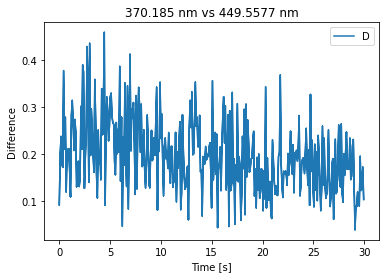

In [59]:
def diff_time (index1, index2):
  col1 = df.iloc[:, index1].values
  col2 = df.iloc[:, index2].values
  y = col1 - col2
  x = (df.iloc[:, 1] - df.iloc[0 , 1])/1000
  plt.plot(x, y)
  plt.xlabel('Time [s]')
  plt.ylabel('Difference')
  plt.title(f'{df.columns[index1]} nm vs {df.columns[index2]} nm')
  plt.legend('Data')
  plt.savefig('Difference over time.png')

diff_time(400, 1000)

In [71]:
new_df = reduce(step = 10) 

x = df.iloc[:,0]
y_1 = df
y_2 = new_df

plt.plot(x, y_1, 'r')
plt.plot(x, y_2, 'b')

plt.xlabel('Time [s]')
plt.ylabel('Full and reduced dataset')
plt.legend(['Full dataset', 'Reduced dataset'])
plt.show()